# <b><u> Project Title : Customer Segmentation. </u></b>

![alt text](https://aeroleads.com/blog/wp-content/uploads/2017/07/Aeroleads-customer-Segmentation.png)

# **Problem Description** 

>  In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.



# **Attribute Information**

*  InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*  Description: Product (item) name. Nominal.
*  Quantity: The quantities of each product (item) per transaction. Numeric.
*  InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
*  UnitPrice: Unit price. Numeric, Product price per unit in sterling.
*  CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*  Country: Country name. Nominal, the name of the country where each customer resides.

In [2]:
# Mount Drive to load data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries and Data.** 

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
data=pd.read_excel("/content/drive/MyDrive/Capstone 4/Online Retail.xlsx")

# **First Look**

In [5]:
# Fisrt 5 values.
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
# Last 5 values.
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 5268


In [10]:
# Removing Duplicate Entries 
duplicate_data = data[data.duplicated(keep = 'last')]
duplicate_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541640,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541644,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom
541646,581538,23275,SET OF 3 HANGING OWLS OLLIE BEAK,1,2011-12-09 11:34:00,1.25,14446.0,United Kingdom
541656,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom


In [12]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [13]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (536641, 8) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
InvoiceNo,object,536641,25900,0,0.000000
StockCode,object,536641,4070,0,0.000000
Description,object,535187,4223,1454,0.270945
Quantity,int64,536641,722,0,0.000000
InvoiceDate,datetime64[ns],536641,23260,0,0.000000
UnitPrice,float64,536641,1630,0,0.000000
CustomerID,float64,401604,4372,135037,25.163377
Country,object,536641,38,0,0.000000


In [14]:
# Statistical info.
data.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,536641.0,25900.0,573585.0,1114.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,536641,4070,85123A,2301,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,535187,4223,WHITE HANGING HEART T-LIGHT HOLDER,2357,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,536641.0,NaN,NaN,NaN,NaT,NaT,9.620029,219.130156,-80995.0,1.0,3.0,10.0,80995.0
InvoiceDate,536641,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,536641.0,NaN,NaN,NaN,NaT,NaT,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,401604.0,NaN,NaN,NaN,NaT,NaT,15281.160818,1714.006089,12346.0,13939.0,15145.0,16784.0,18287.0
Country,536641,38,United Kingdom,490300,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> `Quantity` and `Unitprice` can never be a Negative value

In [15]:
# Filter out records with negative values
data = data[data['Quantity']>0]
data = data[data['UnitPrice']>0]

In [16]:
#Customer distribution by country
cust_data=data.groupby("Country")["CustomerID"].count().reset_index().sort_values('CustomerID', ascending=False)
print(cust_data)

                 Country  CustomerID
36        United Kingdom      349203
14               Germany        9025
13                France        8326
10                  EIRE        7226
31                 Spain        2479
24           Netherlands        2359
3                Belgium        2031
33           Switzerland        1841
27              Portugal        1453
0              Australia        1181
25                Norway        1071
19                 Italy         758
6        Channel Islands         747
12               Finland         685
7                 Cyprus         603
32                Sweden         450
1                Austria         398
9                Denmark         380
26                Poland         330
20                 Japan         321
18                Israel         245
37           Unspecified         241
30             Singapore         222
17               Iceland         182
34                   USA         179
5                 Canada         151
1

In [17]:
# Keep only United Kingdom data
data = data[data["Country"] == 'United Kingdom']

In [18]:
#Check for missing values in the dataset
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130782
Country             0
dtype: int64

In [19]:
#Remove missing values from CustomerID column, can ignore missing values in description column
data = data[pd.notnull(data['CustomerID'])]

In [20]:
#Convert the string date field to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

#Add new column depicting total amount
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

In [21]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
data.shape

(349203, 9)

In [22]:
# Filter the columns
data=data[["CustomerID","InvoiceNo","InvoiceDate","TotalAmount","Country"]]

In [23]:
# Fisrt 5 values.
data.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalAmount,Country
0,17850.0,536365,2010-12-01 08:26:00,15.30,United Kingdom
1,17850.0,536365,2010-12-01 08:26:00,20.34,United Kingdom
2,17850.0,536365,2010-12-01 08:26:00,22.00,United Kingdom
3,17850.0,536365,2010-12-01 08:26:00,20.34,United Kingdom
4,17850.0,536365,2010-12-01 08:26:00,20.34,United Kingdom


#RFM Modelling

In [24]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of invoice no. of transaction(s),
# Monetary = Sum of Total Amount for each customer

import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days,
                                            'InvoiceNo': lambda x: len(x), 
                                            'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)
# Fisrt 5 values.
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [1]:
# Function to create Histogram 
def Histogram(A):
    fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.histplot(data=RFMScores,kde=True, x=A,bins=25,ax=ax,color='red')
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(A, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
    ax.set_title("Histogram", color='#F5E9F5', fontsize=30)
   

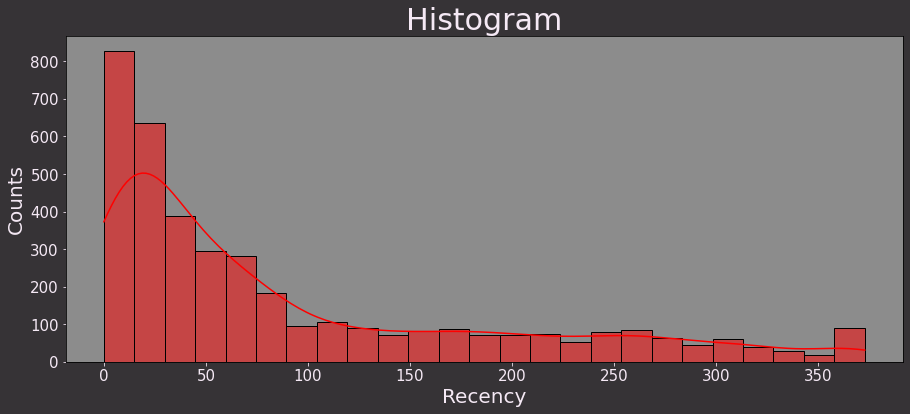

In [25]:
# Histogram for Recency
Histogram("Recency")

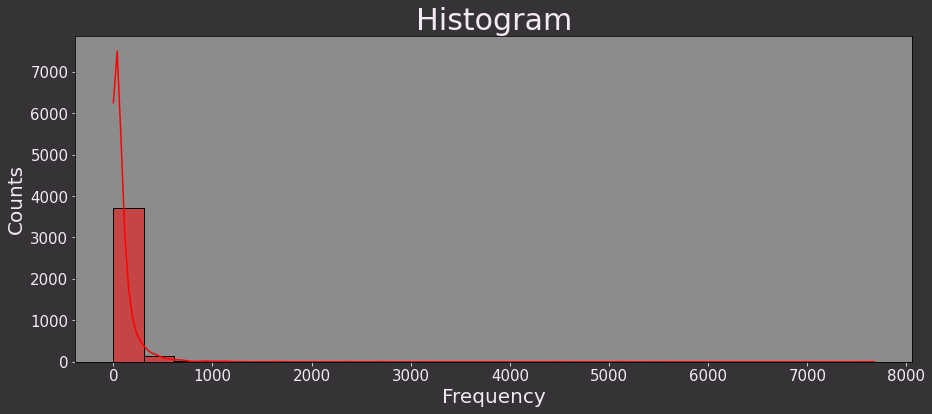

In [26]:
# Histogram for Frequency
Histogram("Frequency")

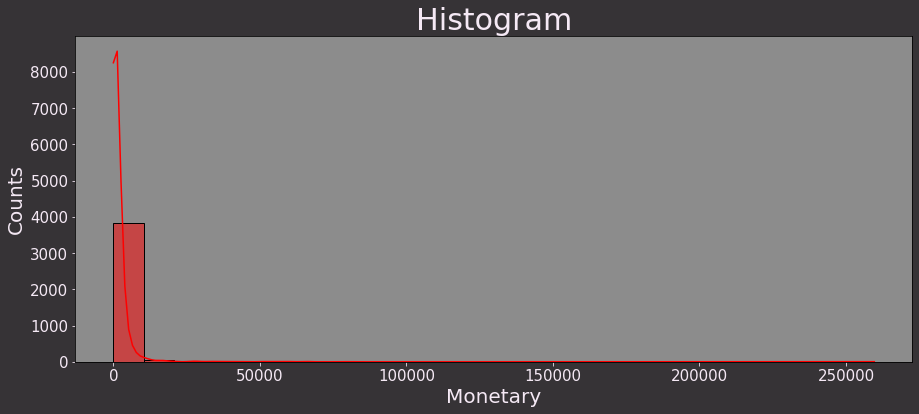

In [27]:
# Histogram for Monetary
Histogram("Monetary")

In [28]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.18500000000006,
  0.5: 644.9749999999999,
  0.75: 1571.285}}

In [29]:
#Functions to create R, F and M segments

def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))        

In [30]:
# Fisrt 5 values.
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4412,33053.19,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [31]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4412,33053.19,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


In [32]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4412,33053.19,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [33]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,336,194390.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2366,60632.75,1,1,1,111,3,Platinum
7,13089.0,2,1814,58762.08,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


In [34]:
# Create a Function to plot different Scatter plots
def Scater_plot(A,B):
  fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
  ax.patch.set_facecolor('#8C8C8C')
  sns.scatterplot(data=RFMScores, x=A, y=B, hue='RFM_Loyalty_Level',s=250, palette=["red","grey","black","pink"])
  ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
  ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
  ax.set_xlabel(A, color='#F5E9F5', fontsize=20)
  ax.set_ylabel(B,  color='#F5E9F5', fontsize=20)
  ax.set_title("Scatter-Plot", color='#F5E9F5', fontsize=30)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)

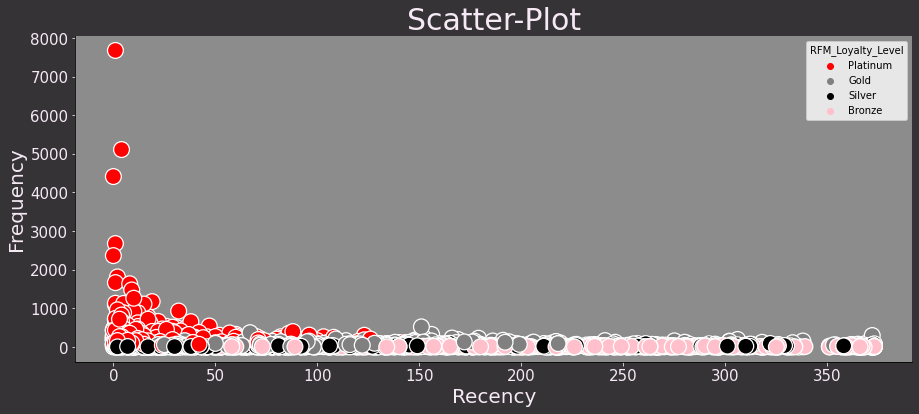

In [35]:
Scater_plot('Recency','Frequency')

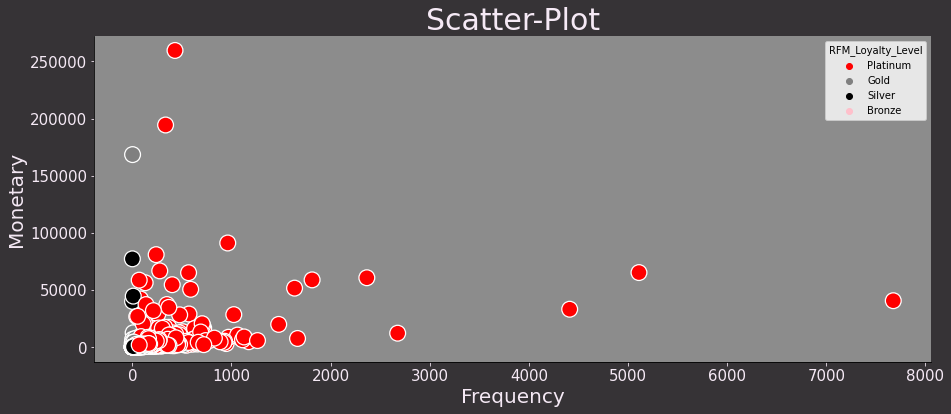

In [36]:
Scater_plot('Frequency','Monetary')

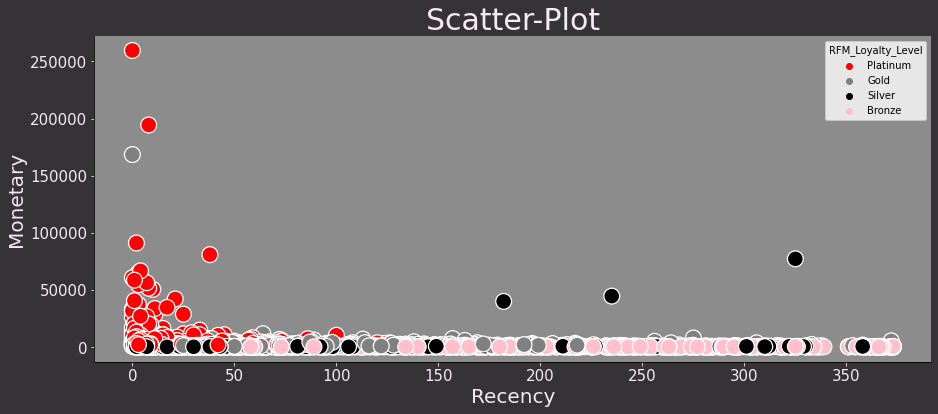

In [37]:
Scater_plot('Recency','Monetary')

# Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">



Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation


## K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

Let's apply K-means clustering to the  dataset.

In [41]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [44]:
# Function to create Histogram 
def Histogram(A):
    fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
    ax.patch.set_facecolor('#8C8C8C')
    sns.histplot(data=Log_Data, x=A,bins=25,ax=ax,color='red',kde=True)
    ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
    ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
    ax.set_xlabel(A, color='#F5E9F5', fontsize=20)
    ax.set_ylabel("Counts",  color='#F5E9F5', fontsize=20)
    ax.set_title("Histogram", color='#F5E9F5', fontsize=30)
   

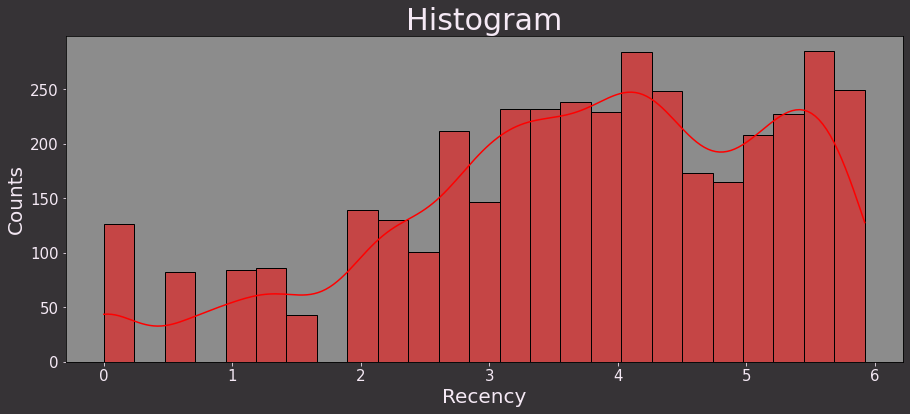

In [45]:
# Histogram for Recency
Histogram("Recency")

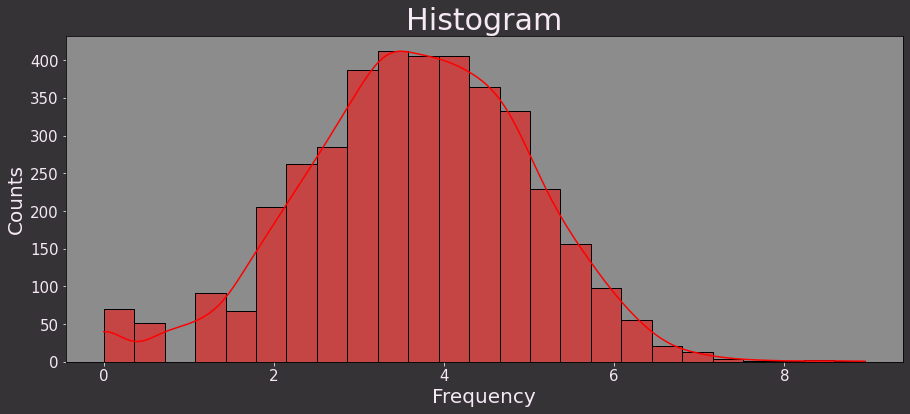

In [46]:
# Histogram for Frequency
Histogram("Frequency")

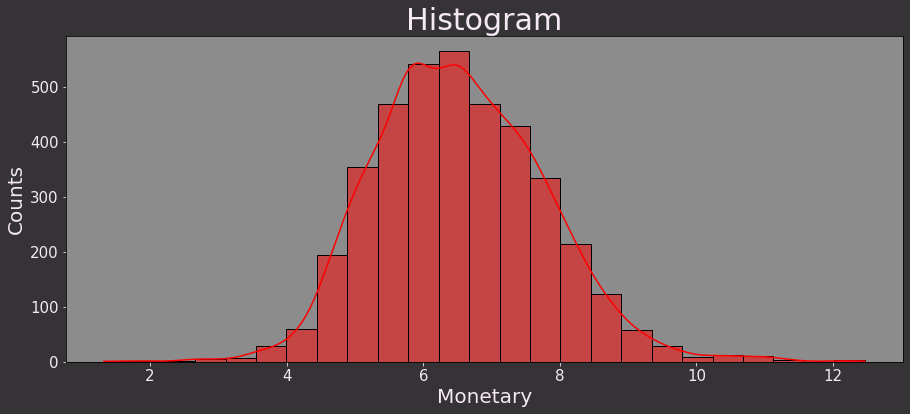

In [47]:
# Histogram for Monetary
Histogram("Monetary")

In [50]:
from sklearn.preprocessing import MinMaxScaler

#Bring the data on same scale
scaleobj = MinMaxScaler()
Scaled_Data = scaleobj.fit_transform(Log_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Data.columns)

In [51]:
Scaled_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,0.976697,0.000000,0.891162
12747.0,0.117021,0.518109,0.629879
12748.0,0.000000,0.938073,0.815074
12749.0,0.185579,0.591661,0.627636
12820.0,0.185579,0.455846,0.495828
...,...,...,...
18280.0,0.949679,0.257433,0.347600
18281.0,0.876900,0.217527,0.275460
18282.0,0.328605,0.277778,0.346344


> In this section, we will build multiple clusters upon our RFM data (data_norm) and will try to find out the optimal number of clusters in our data using the elbow method.

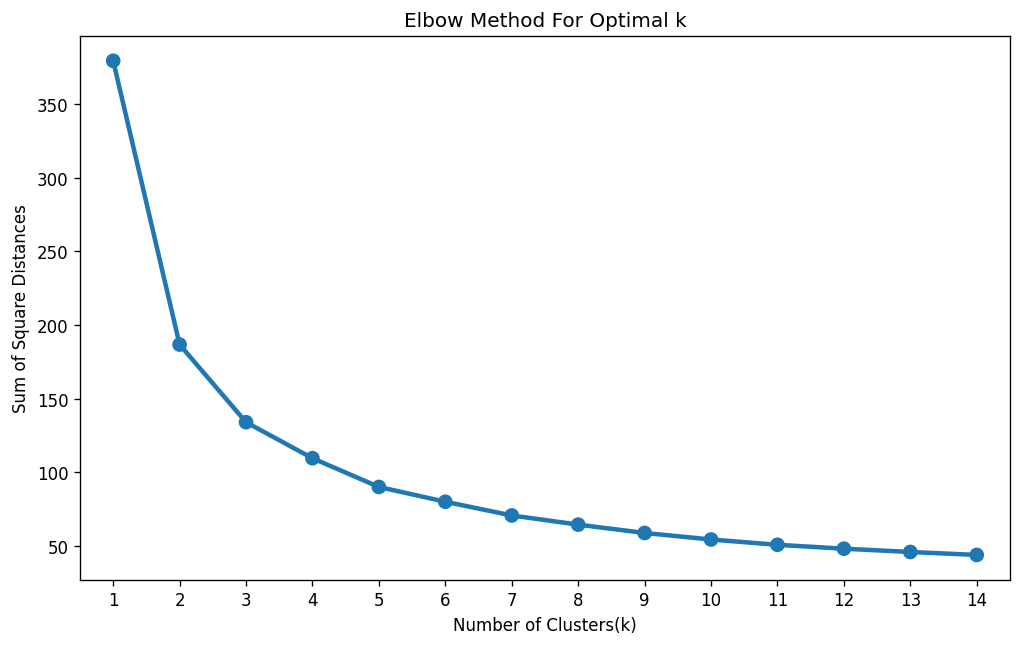

In [52]:
from sklearn.cluster import KMeans
plt.figure(figsize=(10,6), dpi=120)
inertias = {}
for k in range(1,15):
    model = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000,random_state=42)
    model = model.fit(Scaled_Data)
    inertias [k] = model.inertia_

#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(inertias.keys()), y = list(inertias.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

> From the above plot, we can see that the optimal number of cluster is 3 or 4.

> ### Let us take k = 3 first

In [53]:
#Perform K-Mean Clustering or build the K-Means clustering model
model = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
# Compute k-means clustering on pre-processed data
model.fit(Scaled_Data)
#Find the clusters for the observation given in the dataset
RFMScores['Cluster K3'] = model.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster K3
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,1
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,2
12748.0,1,4412,33053.19,1,1,1,111,3,Platinum,2
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,2
12820.0,3,59,942.34,1,2,2,122,5,Platinum,2


In [55]:
# Calculate average RFM values and size for each cluster
summary_k3 = RFMScores.groupby(['Cluster K3']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

> ### Let us take k = 4 

In [56]:
#Perform K-Mean Clustering or build the K-Means clustering model
model = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 1000)
# Compute k-means clustering on pre-processed data
model.fit(Scaled_Data)
#Find the clusters for the observation given in the dataset
RFMScores['Cluster K4'] = model.labels_

In [57]:
# Calculate average RFM values and size for each cluster
summary_k4 = RFMScores.groupby(['Cluster K4']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

>Let us view the results side by side.

In [58]:
display(summary_k3)
display(summary_k4)

Recency Frequency Monetary      
              mean      mean     mean count
Cluster K3                                 
0             41.0      82.0   1408.0  1727
1            194.0      24.0    544.0  1465
2              6.0     237.0   5572.0   728

Recency Frequency Monetary      
              mean      mean     mean count
Cluster K4                                 
0             39.0      21.0    415.0   855
1              5.0     230.0   5528.0   688
2             49.0     126.0   2142.0  1136
3            215.0      24.0    558.0  1241

From the above analysis, we can see that there should be 4 clusters in our data. To understand what these 4 clusters mean in a business scenario, we should look back the table comparing the clustering performance of 3 and 4 clusters for the mean values of recency, frequency, and monetary metric. On this basis, let us label the clusters as ‘New customers’, ‘Lost customers’, ‘Best customers’, and ‘At risk customers’.

![alt text](https://miro.medium.com/max/700/1*QcPMMBEl-iAHqQ7UoW4CxQ.png)

In [59]:
# Create a Function to plot different Scatter plots
def Scater_plot(A,B):
  fig, ax = plt.subplots(figsize=(15,6),facecolor="#363336")
  ax.patch.set_facecolor('#8C8C8C')
  sns.scatterplot(data=RFMScores, x=A, y=B, hue='RFM_Loyalty_Level',s=250,palette=["red","grey","black","pink"])
  ax.tick_params(axis='x', colors='#F5E9F5',labelsize=15) 
  ax.tick_params(axis='y', colors='#F5E9F5',labelsize=15)
  ax.set_xlabel(A, color='#F5E9F5', fontsize=20)
  ax.set_ylabel(B,  color='#F5E9F5', fontsize=20)
  ax.set_title("Scatter-Plot", color='#F5E9F5', fontsize=30)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(True)

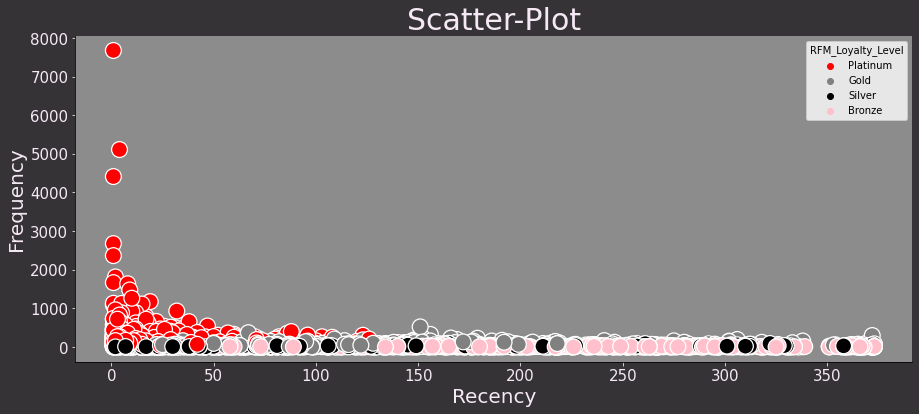

In [60]:
Scater_plot("Recency", "Frequency")

# Conclusion
* Customer segmentation is a highly effective strategy for organizations because it allows them to know which customers care about them and understand their needs enough to send a message that ensures brand success.
* we used RFM Modeling to see the relation between Recency,Frequncy and Monetary.
* After RFM model we used this data to perform clustering with the help of k mean clustering Algorithm.
* At the end we make 4 clusters of customers named as.
  1. New Customers
  2. Lost Customers
  3. Best Customers
  4. At Risk Customers

# Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

The following topics were covered in this collab:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means
-


Check out these resources to learn more:

- https://www.coursera.org/learn/machine-learning
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html